In [6]:
from tqdm import tqdm

from tools import *
from scipy.ndimage import gaussian_filter

from utils_texture import compute_texture_info, compute_probability, create_scribble, compute_distance






###########################################################################################
# Parameters of the experiment
# Baseline: alpha=30, sigma=30, LMBD=100, NB_ITERS = 100

showScribble =  True
showDistanceMap = True
showSegmentation = True
NB_ITERS = 100
alpha = 30  # Distance parameter: indicates how segmentation is locally sensible to the input scribble
sigma = 30  # Smoothing parameter: indicates how segmentation depends on color
LMBD = 30  # Regularization parameter:
eps = 10e-7
USE_DIST = True
USE_COLOR = True
MARGINAL = False
color_palette = [[0, 1, 1], [1, 0, 0], [0, 0, 1], [0, 1, 0], [1, 1, 1], [0.5, 0.5, 0]]
###########################################################################################





image with texture shape: (332, 500, 13)


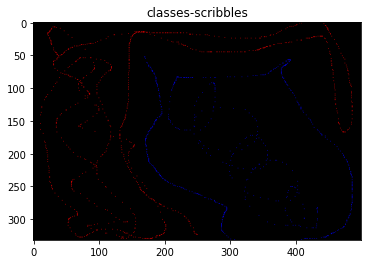

>> Computing shortest path to scribble...


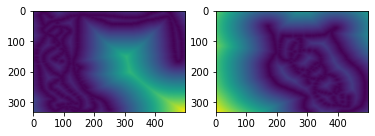

In [7]:
img_name = 'chat'

original_img = plt.imread('input/chat.jpg')

img = compute_texture_info(original_img)
print(f"image with texture shape: {img.shape}")


img = img / np.max(img) * 255.
NB_CLASSES = 2

scribbles, X,Y,I = create_scribble(img, img_name, 'input/', showScribble, NB_CLASSES,color_palette)



# Compute shortest path to scribble (rho)
print('>> Computing shortest path to scribble...')
n, m = img.shape[:2]
dists  = compute_distance(img, X, Y, NB_CLASSES, showDistanceMap)


In [8]:
print('>> Computing segmentation...')

seg_class,P,f = compute_probability(img, scribbles, X, Y, I, dists, alpha, eps, sigma, USE_DIST, USE_COLOR, MARGINAL, NB_CLASSES)


# Run the optimization
g = compute_g(img)
smooth_seg_class = np.around(gaussian_filter(seg_class, 1))
theta_ini = compute_theta(smooth_seg_class)
primal, dual, hist_theta = optimize_primal_dual(f, g, NB_ITERS, theta_ini, lmbd=LMBD)

print('... Done')



>> Computing segmentation...


100%|██████████| 332/332 [02:47<00:00,  1.98it/s]


Dual energy = 25907.025021781166 ; Primal Energy = -9306579.975772934 ; Gap = -9332487.000794714 ; Iteration = 0
Dual energy = 26091.112473445304 ; Primal Energy = 26753.501812679395 ; Gap = 662.3893392340906 ; Iteration = 1
Dual energy = 26167.372329673 ; Primal Energy = 26756.312630751778 ; Gap = 588.9403010787792 ; Iteration = 2
Dual energy = 26261.650436511718 ; Primal Energy = 26758.308482256827 ; Gap = 496.6580457451091 ; Iteration = 3


KeyboardInterrupt: 

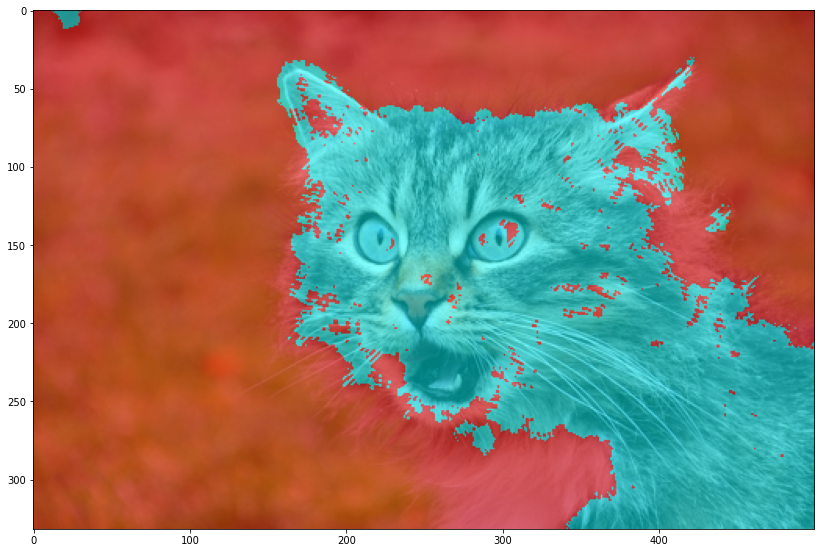

In [ ]:
# Final segmentation
best = np.argmax(hist_theta[-0], axis=0)
plt.figure(figsize=(14, 12))

# plt.subplot(1, NB_CLASSES, 1)
img2 = np.zeros(original_img.shape)
for i in range(0, NB_CLASSES):
    img2[best == i, :] = color_palette[i]


plt.imshow(original_img)
plt.imshow(img2, alpha = 0.5)
